In [1]:
%run func_def.ipynb

imports loaded.

Pre-Processing func:
********************
    get_height(item)
    get_weight(item)
    get_reach(item)
    get_std_reach(item, height, reach_list, height_list)
    get_age(item)
    get_std_age(item, age_list)
    get_win_perc(name, date, df)
    get_lose_streak_data_frame(name, date, df)
    get_win_streak_data_frame(name, date, df)
    get_streak_data_frame(name, date, df)
    get_win_streak(name, date, df)
    get_lose_streak(name, date, df)
    get_fighter_stats(name, data )
    add_columns(data, column_list)

Feature Engineering func:
*************************
    get_stat(index, data, stat='height', fo='')
    get_swaped_row(index, data)
    get_wins(combo, data)
    get_wins_ratio(combo, data)

stats_model_training func:
********************************
    get_sig_features(data, sig_r)
    get_r_score(X, y)
    set_train_test(X_columns, y_columns, data, test_size=0.3, valid_size=0.3)
    set_random_forest_reg(X_columns, y_columns, data)
    set_predictions(mod

In [2]:
loc = '../data/'
file = 'ufc_data_features.csv'
df = pd.read_csv(loc+file)
df = df[df.columns[1:len(df.columns)]]
df.date = pd.to_datetime(df.date)
print('Data Frame loaded: '+str(df.shape))
df.tail(3)

Data Frame loaded: (6829, 22)


,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6826,lose,Kailin Curran,Aleksandra Albu,2017-07-29,Women's Strawweight,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739
6827,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286
6828,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961


In [3]:
df.describe()

,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
count,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03,6.829000e+03
mean,-4.857083e-16,-7.687347e-17,-1.303463e-16,1.829936e-16,-6.015266e-18,-5.838060e-17,5.267422e-18,-1.805840e-16,2.214268e-17,4.495192e-18,-6.044530e-17,-9.257540e-17,1.371522e-13,9.506965e-17,3.525139e-16,-7.179301e-17
std,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00,1.000073e+00
min,-5.423642e+00,-6.020946e+00,-7.915341e+00,-8.489667e+00,-6.544082e+00,-3.511708e+00,-3.374843e+00,-1.445663e+01,-5.669960e+00,-6.743786e+00,-1.093554e+01,-6.086546e+00,-5.669991e+00,-2.551827e+00,-7.449588e+00,-6.440661e+00
25%,-8.920137e-03,-4.762941e-01,-4.130699e-01,8.337477e-03,-5.784259e-01,-5.599585e-01,-6.131133e-01,-4.709791e-01,-6.512713e-01,-5.646976e-01,-5.462817e-01,-5.213151e-01,-5.448071e-02,-5.062558e-01,-1.774728e-02,1.338884e-02
50%,-8.920137e-03,-2.672777e-02,-1.821347e-02,8.337477e-03,-2.076068e-04,2.279538e-03,-6.879936e-03,7.981507e-03,-2.315007e-02,4.428908e-03,5.034966e-03,-1.538509e-02,-5.448071e-02,5.137144e-03,-1.774728e-02,1.338884e-02
75%,-8.920137e-03,4.977663e-01,3.766429e-01,8.337477e-03,5.835705e-01,5.645176e-01,5.993534e-01,4.869421e-01,6.363773e-01,5.735554e-01,5.624774e-01,5.748666e-01,-5.448071e-02,4.909604e-01,5.539327e-01,1.338884e-02
max,6.759482e+00,1.166200e+01,6.299489e+00,7.656542e+00,6.176721e+00,3.516268e+00,3.361083e+00,1.131145e+01,1.200537e+01,5.695694e+00,1.239741e+01,6.055775e+00,5.976451e+00,2.562102e+00,6.842413e+00,5.391764e+00


<AxesSubplot:xlabel='str. acc._dif', ylabel='Count'>

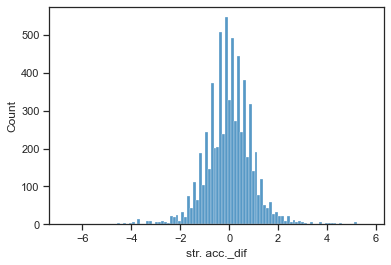

In [4]:
sns.histplot(x=df['str. acc._dif'])

In [5]:
X = df.columns[7:]
data = df.copy()

for feature in X:
    #print(feature)
    ucl = np.mean(df[feature]) + 3.29*np.std(df[feature])
    lcl = np.mean(df[feature]) - 3.29*np.std(df[feature])
    print('cleaning %s: %s' %(feature,data.shape))
    data = data[(data[feature] < ucl) & (data[feature] > lcl)].reset_index(drop=True)
    #print(data.shape)

cleaning str_dif: (6829, 22)
cleaning td_dif: (6764, 22)
cleaning sub_dif: (6697, 22)
cleaning td avg._dif: (6568, 22)
cleaning td acc._dif: (6518, 22)
cleaning td def._dif: (6475, 22)
cleaning sub. avg._dif: (6461, 22)
cleaning slpm_dif: (6388, 22)
cleaning str. acc._dif: (6370, 22)
cleaning sapm_dif: (6299, 22)
cleaning str. def_dif: (6265, 22)
cleaning stance_win_ratio: (6236, 22)
cleaning win_perc_dif: (6198, 22)
cleaning win_strk_dif: (6198, 22)
cleaning lose_strk_dif: (6095, 22)


In [6]:
data.tail(3)

,result,fighter,opponent,date,weight class,method,kd_dif,str_dif,td_dif,sub_dif,td avg._dif,td acc._dif,td def._dif,sub. avg._dif,slpm_dif,str. acc._dif,sapm_dif,str. def_dif,stance_win_ratio,win_perc_dif,win_strk_dif,lose_strk_dif
6063,lose,Kailin Curran,Aleksandra Albu,2017-07-29,Women's Strawweight,U-DEC:,-0.00892,0.123128,-1.597639,0.008337,-0.150322,0.248259,-0.545754,0.199566,-0.613584,-0.320786,-0.491150,1.249440,-0.054481,-2.040434,-0.589427,2.164739
6064,win,Jarred Brooks,Eric Shelton,2017-07-29,Flyweight,S-DEC:,-0.00892,-0.176583,1.561212,0.008337,0.950517,0.213119,0.767752,0.391150,-0.305805,0.329644,-0.129731,-0.099707,1.584492,0.005137,-0.017747,-1.062286
6065,win,Drew Dober,Joshua Burkman,2017-07-29,Lightweight,KO/TKO:Punch,1.34476,0.123128,-0.018213,0.008337,-1.012090,-0.665378,-0.579434,-0.183603,1.094906,-0.239482,0.783004,-0.015385,1.671822,0.132985,-0.017747,-2.137961


In [7]:
data.to_csv('../data/ufc_data_features_no_outliers.csv', index=None)
print('../data/ufc_data_features_no_outliers.csv saved.')

../data/ufc_data_features_no_outliers.csv saved.
